In [1]:
# Import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# ML models
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Model evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Data Preprocessing

In [2]:
# Data Loading
data = pd.read_csv('../input/medical-cost/insurance.csv')

In [3]:
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [5]:
data.shape

(1338, 7)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
data.describe(include=['object'])

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


# EDA and Visualizations

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


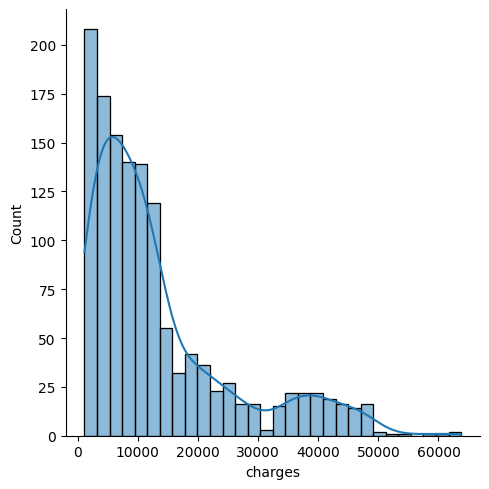

In [10]:
sns.displot(data['charges'], kde=True)

In [11]:
data['charges'] = np.log10(data['charges'])

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


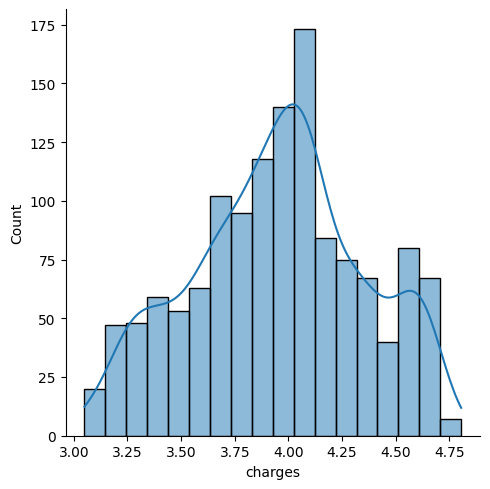

In [12]:
sns.displot(data['charges'], kde=True)

<Axes: xlabel='sex', ylabel='charges'>

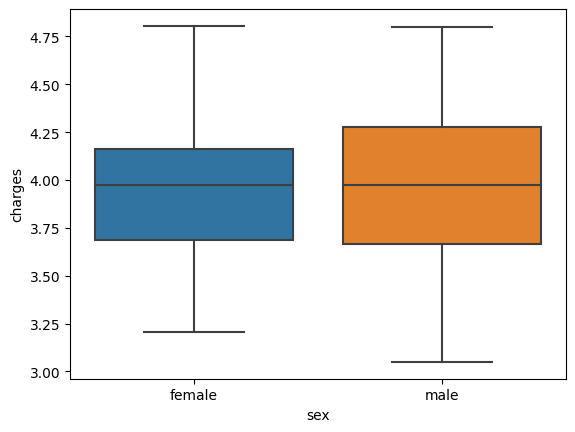

In [13]:
sns.boxplot(x='sex', y='charges', data=data)

<Axes: xlabel='smoker', ylabel='charges'>

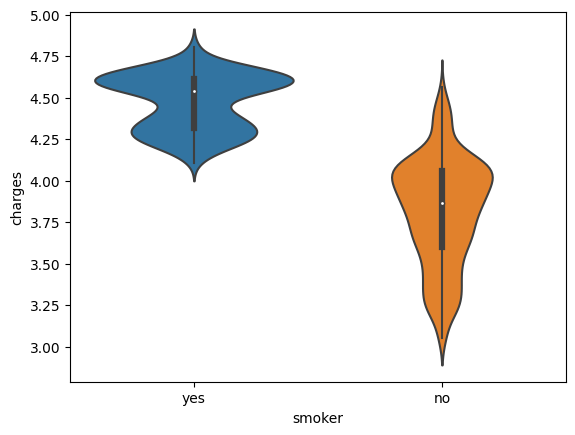

In [14]:
sns.violinplot(x='smoker', y='charges', data=data)

In [15]:
data['sex'] = data['sex'].replace({'female':0, 'male':1})
data['smoker'] = data['smoker'].replace({'no':0, 'yes':1})

/tmp/ipykernel_47/1991119639.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['sex'] = data['sex'].replace({'female':0, 'male':1})
/tmp/ipykernel_47/1991119639.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['smoker'] = data['smoker'].replace({'no':0, 'yes':1})


In [16]:
charges = data['charges'].groupby(data['region']).sum().sort_values(ascending = False)
charges = charges.head()

<Axes: xlabel='region', ylabel='charges'>

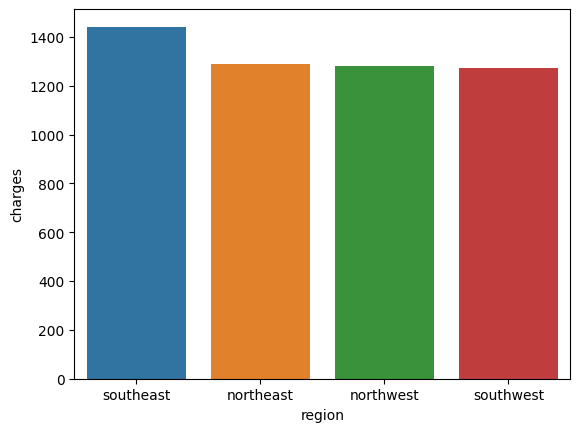

In [17]:
sns.barplot(x=charges.index, y=charges)

In [18]:
# Feature Encoding
le = LabelEncoder()
data['region'] = le.fit_transform(data['region'])

In [19]:
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,4.227499
1,18,1,33.770,1,0,2,3.236928
2,28,1,33.000,3,0,2,3.648308
3,33,1,22.705,0,0,1,4.342116
4,32,1,28.880,0,0,1,3.587358


In [20]:
correlation = data.corr()['charges'].sort_values(ascending=False)
print('Correlation coffecient')
print(correlation)

Correlation coffecient
charges     1.000000
smoker      0.665506
age         0.527834
children    0.161336
bmi         0.132669
sex         0.005632
region     -0.042690
Name: charges, dtype: float64


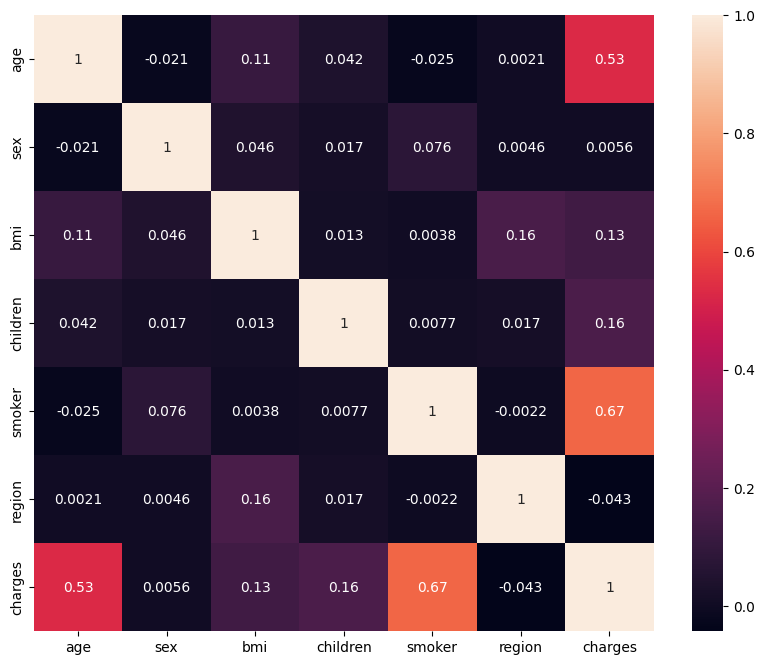

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [22]:
x = data.drop(['charges'], axis=1)
y = data['charges']
print(f'x.shape = {x.shape}')
print(f'y.shape = {y.shape}')

x.shape = (1338, 6)
y.shape = (1338,)


# Data Splitting

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.33, random_state=42)

In [24]:
# Feature Scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [25]:
print(f'x_train.shape = {x_train.shape}')
print(f'y_train.shape = {y_train.shape}')
print(f'x_test.shape = {x_test.shape}')
print(f'y_test.shape = {y_test.shape}')

x_train.shape = (896, 6)
y_train.shape = (896,)
x_test.shape = (442, 6)
y_test.shape = (442,)


# ML Models
# Linear Regression

In [26]:
linearRegression = LinearRegression()
linearRegression.fit(x_train, y_train)

LinearRegression()

In [27]:
y_pred_lin = linearRegression.predict(x_test)

In [28]:
print(f'MAE = {mean_absolute_error(y_test, y_pred_lin)}')
print(f'MSE = {mean_squared_error(y_test, y_pred_lin)}')
print(f'R2 = {r2_score(y_test, y_pred_lin)}')

MAE = 0.11644634283600293
MSE = 0.035460439374685765
R2 = 0.775576369758529


In [29]:
print('Linear Regression Model Training Score: ', linearRegression.score(x_train, y_train))
print('Linear Regression Model Testing Score: ', linearRegression.score(x_test, y_test))

Linear Regression Model Training Score:  0.7621815692010356
Linear Regression Model Testing Score:  0.775576369758529


# Lasso

In [30]:
lasso = Lasso()
lasso.fit(x_train, y_train)

Lasso()

In [31]:
y_pred_lasso = lasso.predict(x_test)

In [32]:
print(f'MAE = {mean_absolute_error(y_test, y_pred_lasso)}')
print(f'MSE = {mean_squared_error(y_test, y_pred_lasso)}')
print(f'R2 = {r2_score(y_test, y_pred_lasso)}')

MAE = 0.3227190672211599
MSE = 0.15819712193521285
R2 = -0.0012050900812541343


In [33]:
print('Lasso Model Training Score: ', lasso.score(x_train, y_train))
print('Lasso Model Testing Score: ', lasso.score(x_test, y_test))

Lasso Model Training Score:  0.0
Lasso Model Testing Score:  -0.0012050900812541343


# Ridge

In [34]:
ridge = Ridge()
ridge.fit(x_train, y_train)

Ridge()

In [35]:
y_pred_ridge = ridge.predict(x_test)

In [36]:
print(f'MAE = {mean_absolute_error(y_test, y_pred_ridge)}')
print(f'MSE = {mean_squared_error(y_test, y_pred_ridge)}')
print(f'R2 = {r2_score(y_test, y_pred_ridge)}')

MAE = 0.11652163907116887
MSE = 0.035461566308043466
R2 = 0.7755692375717982


In [37]:
print('Ridge Model Training Score: ', ridge.score(x_train, y_train))
print('Ridge Model Testing Score: ', ridge.score(x_test, y_test))

Ridge Model Training Score:  0.7621805657032774
Ridge Model Testing Score:  0.7755692375717982


# GradientBoostingRegressor

In [38]:
gb = GradientBoostingRegressor(n_estimators=100, max_depth=7)
gb.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=7)

In [39]:
y_pred_gb = gb.predict(x_test)

In [40]:
print(f'MAE = {mean_absolute_error(y_test, y_pred_gb)}')
print(f'MSE = {mean_squared_error(y_test, y_pred_gb)}')
print(f'R2 = {r2_score(y_test, y_pred_gb)}')

MAE = 0.09655963430240133
MSE = 0.036339572832641255
R2 = 0.7700124702248432


In [41]:
print('GradientBoostingRegressor Model Training Score: ', gb.score(x_train, y_train))
print('GradientBoostingRegressor Model Testing Score: ', gb.score(x_test, y_test))

GradientBoostingRegressor Model Training Score:  0.9945602826235678
GradientBoostingRegressor Model Testing Score:  0.7700124702248432


# RandomForestRegressor

In [42]:
rf = RandomForestRegressor(n_estimators=100, max_depth=5)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=5)

In [43]:
y_pred_rf = rf.predict(x_test)

In [44]:
print(f'MAE = {mean_absolute_error(y_test, y_pred_rf)}')
print(f'MSE = {mean_squared_error(y_test, y_pred_rf)}')
print(f'R2 = {r2_score(y_test, y_pred_rf)}')

MAE = 0.08688469072460443
MSE = 0.027045438291316788
R2 = 0.8288336086680881


In [45]:
print('RandomForestRegressor Model Training Score: ', rf.score(x_train, y_train))
print('RandomForestRegressor Model Testing Score: ', rf.score(x_test, y_test))

RandomForestRegressor Model Training Score:  0.8654602566091061
RandomForestRegressor Model Testing Score:  0.8288336086680881


# DecisionTreeRegressor

In [46]:
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [47]:
y_pred_dt = dt.predict(x_test)

In [48]:
print(f'MAE = {mean_absolute_error(y_test, y_pred_dt)}')
print(f'MSE = {mean_squared_error(y_test, y_pred_dt)}')
print(f'R2 = {r2_score(y_test, y_pred_dt)}')

MAE = 0.11241096379221578
MSE = 0.06250099801567283
R2 = 0.6044408609780073


In [49]:
print('DecisionTreeRegressor Model Training Score: ', dt.score(x_train, y_train))
print('DecisionTreeRegressor Model Testing Score: ', dt.score(x_test, y_test))

DecisionTreeRegressor Model Training Score:  1.0
DecisionTreeRegressor Model Testing Score:  0.6044408609780073


# Compare Between Models

In [50]:
data_df = pd.DataFrame({
    'Model': [
        'Linear Regression',
        'Lasso',
        'Ridge',
        'Random Forest',
        'Decision Tree',
        'Gradient Boosting'
    ],
    'R2_Score': [
        r2_score(y_test, y_pred_lin),
        r2_score(y_test, y_pred_lasso),
        r2_score(y_test, y_pred_ridge),
        r2_score(y_test, y_pred_rf),
        r2_score(y_test, y_pred_dt),
        r2_score(y_test, y_pred_gb)
    ]
}).sort_values(by='R2_Score', ascending=False)

data_df

,Model,R2_Score
3,Random Forest,0.828834
0,Linear Regression,0.775576
2,Ridge,0.775569
5,Gradient Boosting,0.770012
4,Decision Tree,0.604441
1,Lasso,-0.001205
